### 💡 주제
> 미국의 주택 가격 예측 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df = df.drop(labels=['Address'], axis=1)

In [6]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [7]:
df.corr()['Price'].sort_values(ascending=False)[1:]

Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

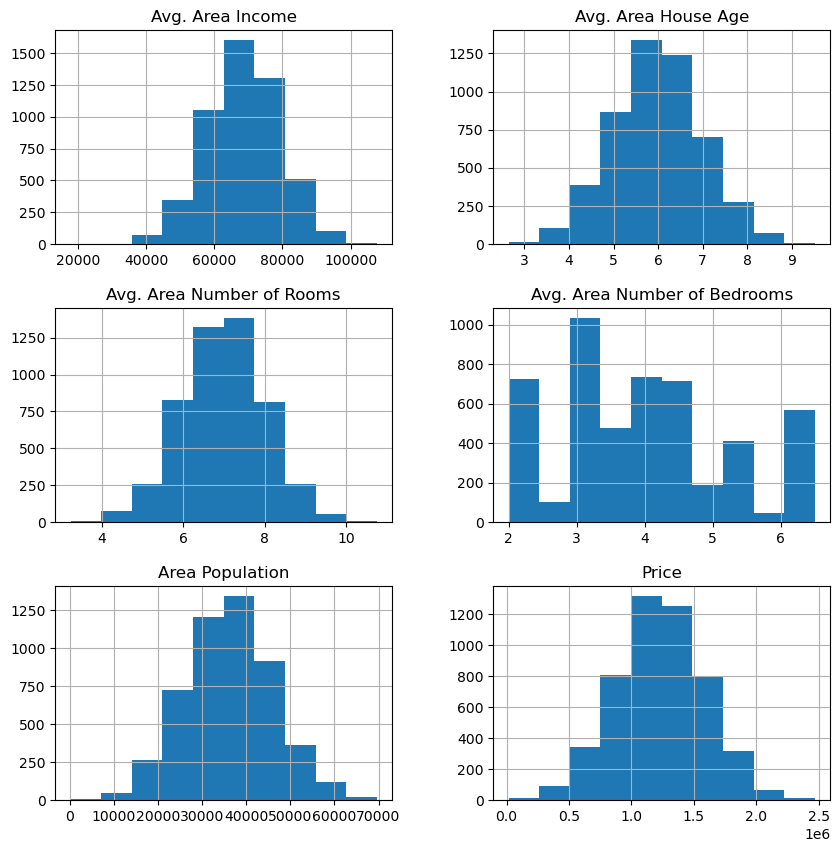

In [8]:
df.hist(figsize=(10,10))

<Axes: >

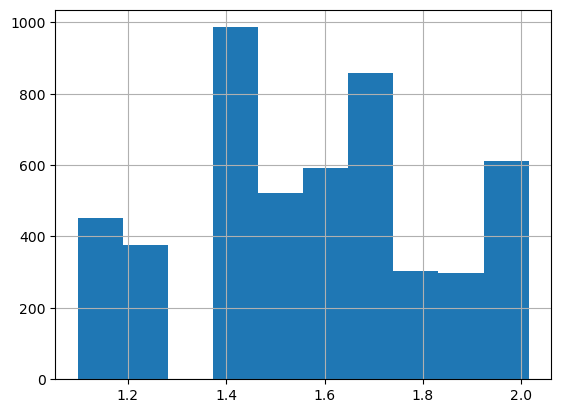

In [9]:
import numpy as np
np.log1p(df['Avg. Area Number of Bedrooms']).hist()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


<Axes: >

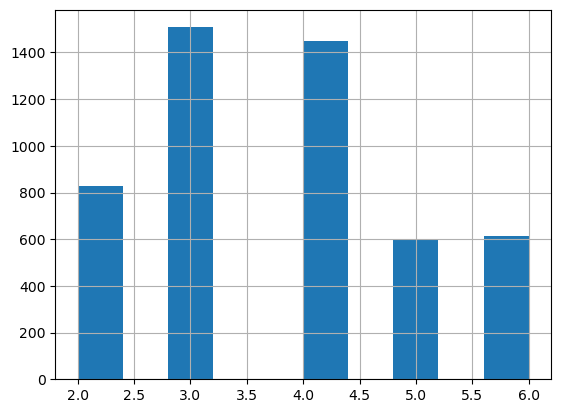

In [11]:
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].astype(np.int16)
df['Avg. Area Number of Bedrooms'].hist()

In [12]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5,42625.620156,1.198657e+06


In [13]:
df.corr()['Price'].sort_values(ascending=False)[1:]

Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.172429
Name: Price, dtype: float64

<Axes: >

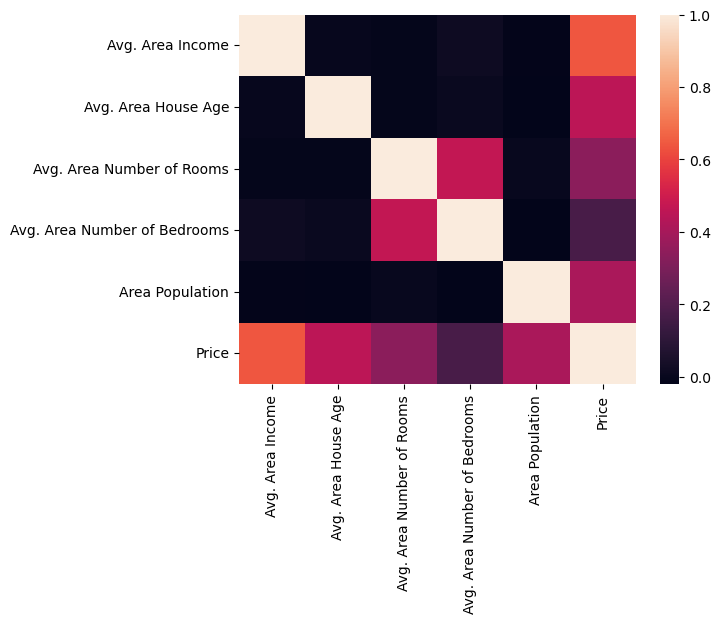

In [14]:
import seaborn as sns

sns.heatmap(df.corr())

### ✨ 1 Cycle
> Pytorch로 LinearRegression 및 해당 데이터의 과적합 분석

1000/100000: lr: 0.0000000000, train_loss: 1604087709696.0000, val_loss: 1609013526528.0000
2000/100000: lr: 0.0000000000, train_loss: 1566818041856.0000, val_loss: 1571810705408.0000
3000/100000: lr: 0.0000000000, train_loss: 1530449362944.0000, val_loss: 1535506644992.0000
4000/100000: lr: 0.0000000000, train_loss: 1494960570368.0000, val_loss: 1500079063040.0000
5000/100000: lr: 0.0000000000, train_loss: 1460329381888.0000, val_loss: 1465507381248.0000
6000/100000: lr: 0.0000000000, train_loss: 1426536136704.0000, val_loss: 1431770890240.0000
7000/100000: lr: 0.0000000000, train_loss: 1393559863296.0000, val_loss: 1398849011712.0000
8000/100000: lr: 0.0000000000, train_loss: 1361380900864.0000, val_loss: 1366722215936.0000
9000/100000: lr: 0.0000000000, train_loss: 1329980112896.0000, val_loss: 1335371235328.0000
10000/100000: lr: 0.0000000000, train_loss: 1299338756096.0000, val_loss: 1304777719808.0000
11000/100000: lr: 0.0000000000, train_loss: 1269438480384.0000, val_loss: 12749

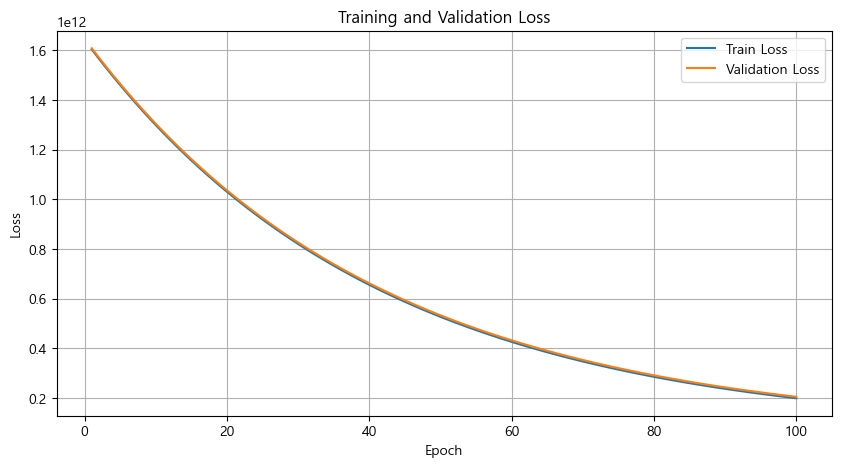

In [72]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

# Validation 데이터 분할
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=124)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

learning_rates = [1e-15]

# 손실 함수들을 담을 리스트를 초기화 
train_losses = []
val_losses = []

for lr in learning_rates:
    # 모델 초기화
    torch.manual_seed(124)
    W = torch.zeros((X_train.shape[1], 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    optimizer = SGD([W, b], lr=lr)

    # 반복횟수 설정
    epochs = 100000
    for epoch in range(1, epochs + 1):
        H = X_train.matmul(W) + b
        loss = torch.mean((y_train - H) ** 2)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 1000번 반복마다 손실 기록
        if epoch % 1000 == 0:
            train_losses.append(loss.item())
            val_loss = torch.mean((y_val - X_val.matmul(W) - b) ** 2)
            val_losses.append(val_loss.item())
            print('{:4d}/{}: lr: {:.10f}, train_loss: {:.4f}, val_loss: {:.4f}'.format(epoch, epochs, lr, loss.item(), val_loss.item()))

# 손실 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


### ✨ 1 Cycle Result
> Pytorch로 선형회귀기법을 사용하여 과적합을 분석한 결과
> Validation Data와 Test데이터간의 loss 값 분포가 완전히 동일 한 것을 볼 수 있으며, 해당 데이터는 과적합의 존재가 전혀 없는 것을 알 수 있었습니다. 

#### ✨ 2 Cycle
>  Sklearn 으로 선형회귀기법과 다항회귀기법 회귀분석

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features , targets = df.iloc[:,:-1] , df.iloc[: ,-1]

X_train, X_test ,y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

# 10-fold 교차 검증을 통한 모델 성능 평가
cv_scores = cross_val_score(l_r, X_train, y_train, cv=10)

# 교차 검증 결과 출력
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.91007982 0.91421874 0.91996958 0.91312963 0.9055856  0.9218239
 0.92222533 0.92693743 0.92925793 0.9010264 ]
Mean CV score: 0.9164254345538225


In [155]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation0(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('Test Data : MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [156]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation1(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('Test Data : MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

Test Data : MSE: 10156482417.3942, RMSE: 100779.3750, MSLE: 0.0107, RMSLE: 0.1033, R2: 0.9176
Test Data : MSE: 10478187699.4710, RMSE: 102363.0192, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9198


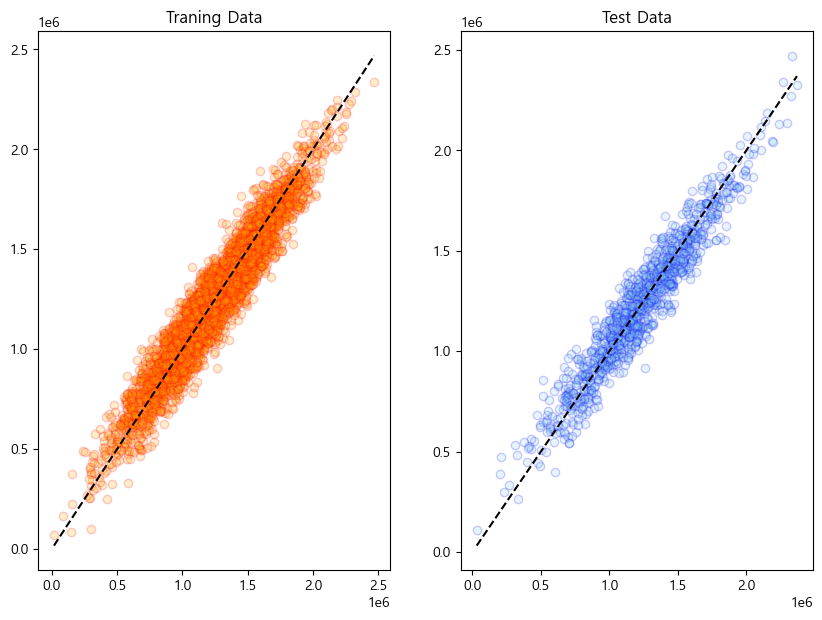

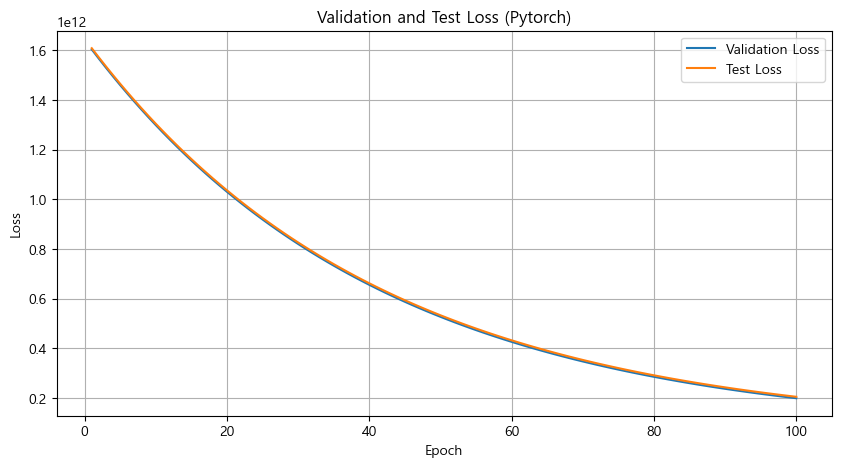

In [160]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
t_prediction = l_r.predict(X_test)

train = get_evaluation0(y_train, prediction)
test = get_evaluation1(y_test, t_prediction)


fig, ax = plt.subplots(1,2 , figsize=(10,7))
ax[0].scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
ax[0].set_title('Traning Data')
ax[1].scatter(y_test, t_prediction, edgecolors='blue', c='skyblue', alpha=0.2)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[1].set_title('Test Data')

plt.show()

# 손실 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Validation Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation and Test Loss (Pytorch)')
plt.legend()
plt.grid(True)
plt.show()

### 📌 Sklearn LinearRegression 과적합 분석
> sklearn의 LinearRegression 라이브러리를 사용하여 검증데이터와 Test 데이터 간의 분포가 거의 일치하며,
> 과적합 존재는 없는 것으로 나타났습니다.
>
> 해당 데이터는 과적합 문제가 발생할 가능성은 매우 낮을 것으로 판단됩니다.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = df.iloc[:,:-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

print('Coefficients (W1 to W5):', l_r.coef_)
print('Intercept (b):', l_r.intercept_)

Coefficients (W1 to W5): [2.15525035e+01 1.65963465e+05 1.21081616e+05 1.94230529e+03
 1.51812981e+01]
Intercept (b): -2640914.400838993


In [17]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [18]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 10359858078.5985, RMSE: 101783.3880, MSLE: 0.0125, RMSLE: 0.1119, R2: 0.9211


In [103]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

features, targets = df.iloc[:,:-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [104]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 10556232776.6050, RMSE: 102743.5291,  R2: 0.9192


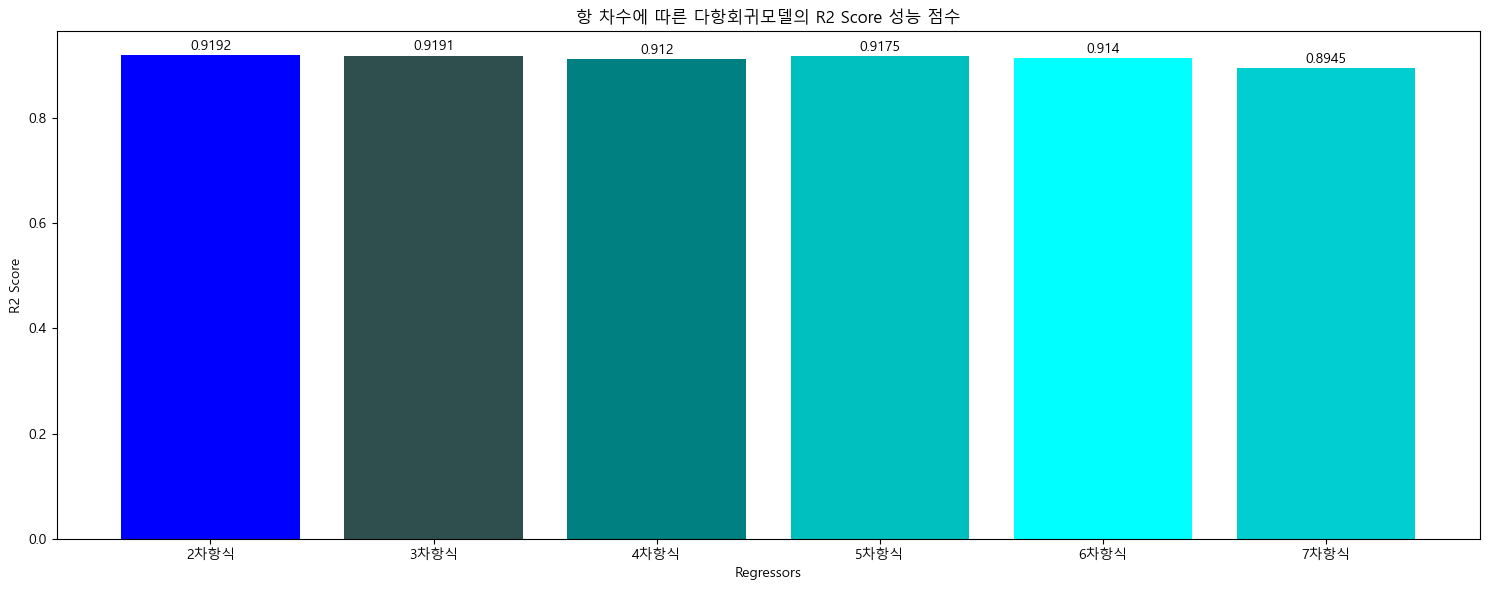

In [96]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, figsize=(15, 6))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

colors = ['blue', 'darkslategray', 'teal', 'c', 'cyan', 'darkturquoise', 'cadetblue']

scores = [0.9192, 0.9191, 0.9120, 0.9175, 0.9140, 0.8945]

regressers = ['2차항식','3차항식', '4차항식', '5차항식', '6차항식', '7차항식']

for i, v in enumerate(scores) :
    plt.text(i, v+0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(regressers, scores, color=colors)
    plt.xlabel('Regressors')
    plt.ylabel('R2 Score')
    plt.title('항 차수에 따른 다항회귀모델의 R2 Score 성능 점수')

plt.tight_layout() 

plt.show()

### 💡 2 Cycle Result
> Linear Regression 선형회귀모델의 경우 R2 Score가 0.9211로 매우 좋은 성능을 가진 것을 알 수 있었습니다.
>
> 다항회귀 모델의 경우 항의 차수 (degree)를 2차항 ~ 3차항 까지 주었을 때 해당 모델에서 성능이 가장 좋았습니다.
>
> 다항회귀로 분석하였을때도 마찬가지로 해당 데이터의 성능이 매우 좋은 것을 알 수 있습니다.
>
> 결과적으로 해당 데이터는 선형 데이터에 가깝습니다.

### 💡 3 Cycle
> Sklearn에서 제공하는 회귀모델들을 사용하여 성능 비교

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

dt_r = DecisionTreeRegressor(random_state=105)
rf_r = RandomForestRegressor(random_state=105)
gb_r = GradientBoostingRegressor(random_state=105, n_estimators=100)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 32519598527.4383, RMSE: 180331.9121,  R2: 0.7522
RandomForestRegressor
MSE: 14861801243.6791, RMSE: 121908.9875,  R2: 0.8868
GradientBoostingRegressor
MSE: 12394777845.5539, RMSE: 111331.8366,  R2: 0.9056
XGBRegressor
MSE: 16860705514.3557, RMSE: 129848.7794,  R2: 0.8715
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 5
[LightGBM] [Info] Start training from score 1232567.230596
LGBMRegressor
MSE: 13228270364.2391, RMSE: 115014.2181,  R2: 0.8992


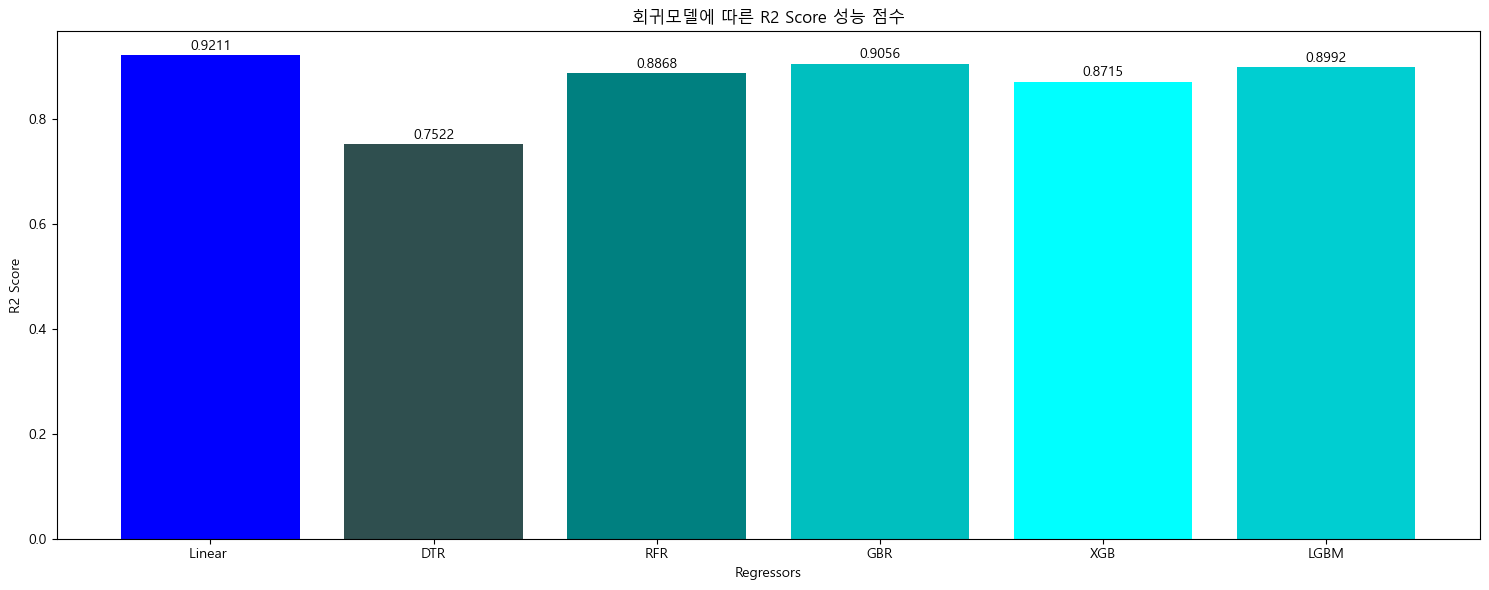

In [106]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, figsize=(15, 6))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

colors = ['blue', 'darkslategray', 'teal', 'c', 'cyan', 'darkturquoise', 'cadetblue']

scores = [0.9211, 0.7522, 0.8868, 0.9056, 0.8715, 0.8992]

regressers = ['Linear ','DTR', 'RFR', 'GBR', 'XGB', 'LGBM']

for i, v in enumerate(scores) :
    plt.text(i, v+0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(regressers, scores, color=colors)
    plt.xlabel('Regressors')
    plt.ylabel('R2 Score')
    plt.title('회귀모델에 따른 R2 Score 성능 점수')

plt.tight_layout() 

plt.show()

### 💡 3 Cycle Result
> 모든 회귀 모델들의 성능을 분석한 결과 LinearRegression모델 (선형회귀)모델이 가장 성능이 좋으므로, 해당 데이터는 선형데이터일 가능성이 높습니다.​


In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features , targets = df.iloc[:,:-1] , df.iloc[: ,-1]

X_train, X_test ,y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

print('W1:{:.4f}, W2:{:.4f}, W3:{:.4f}, W4:{:.4f}, W5:{:.4f}, b:{:.4f}'
      .format(l_r.coef_[0], l_r.coef_[1], l_r.coef_[2], l_r.coef_[3], l_r.coef_[4], l_r.intercept_))

W1:21.5525, W2:165963.4648, W3:121081.6156, W4:1942.3053, W5:15.1813, b:-2640914.4008


In [24]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 10359858078.5985, RMSE: 101783.3880, MSLE: 0.0125, RMSLE: 0.1119, R2: 0.9211


### 💡 4 Cycle 
> 종속변수와 독립변수들의 상관관계 시각화
> 
>
> 상관관계가 높은 독립변수들과 종속변수의 단순선형회귀분석

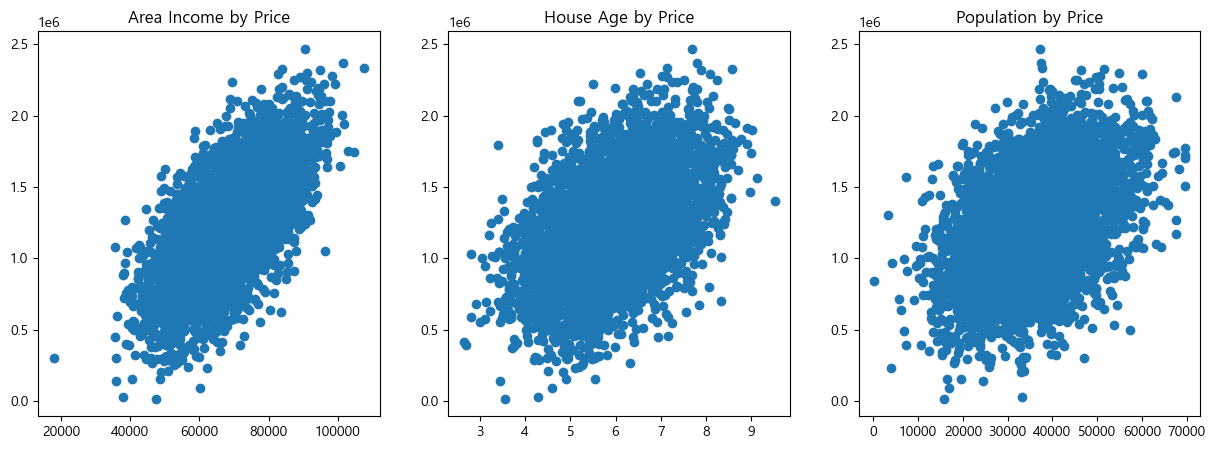

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df['Avg. Area Income'], df['Price'])
axes[0].set_title('Area Income by Price')
axes[1].scatter(df['Avg. Area House Age'], df['Price'])
axes[1].set_title('House Age by Price')
axes[2].scatter(df['Area Population'], df['Price'])
axes[2].set_title('Population by Price')
plt.show()


In [26]:
income_df = df[['Avg. Area Income', 'Price']]
income_df

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


In [27]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5,42625.620156,1.198657e+06


In [28]:
income1_df = df[['Avg. Area House Age', 'Price']]
income1_df

,Avg. Area House Age,Price
0,5.682861,1.059034e+06
1,6.002900,1.505891e+06
2,5.865890,1.058988e+06
3,7.188236,1.260617e+06
4,5.040555,6.309435e+05
...,...,...
4995,7.830362,1.060194e+06
4996,6.999135,1.482618e+06
4997,7.250591,1.030730e+06
4998,5.534388,1.198657e+06


In [29]:
income2_df = df[['Area Population', 'Price']]
income2_df

,Area Population,Price
0,23086.800503,1.059034e+06
1,40173.072174,1.505891e+06
2,36882.159400,1.058988e+06
3,34310.242831,1.260617e+06
4,26354.109472,6.309435e+05
...,...,...
4995,22837.361035,1.060194e+06
4996,25616.115489,1.482618e+06
4997,33266.145490,1.030730e+06
4998,42625.620156,1.198657e+06


In [30]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [31]:
from sklearn.model_selection import train_test_split
import torch

from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(105)

features, targets = income_df.iloc[:, :-1], income_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel()
# 0.0000000001 == 1e-10
optimizer = SGD(l_r.parameters(), lr=1e-10)

epochs = 1700

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))

 100/1700: W: 18.0564, b: -0.9280, loss: 74594533376.0000
 200/1700: W: 18.0564, b: -0.9281, loss: 74594533376.0000
 300/1700: W: 18.0564, b: -0.9282, loss: 74594533376.0000
 400/1700: W: 18.0564, b: -0.9283, loss: 74594533376.0000
 500/1700: W: 18.0564, b: -0.9284, loss: 74594533376.0000
 600/1700: W: 18.0564, b: -0.9285, loss: 74594533376.0000
 700/1700: W: 18.0564, b: -0.9286, loss: 74594533376.0000
 800/1700: W: 18.0564, b: -0.9287, loss: 74594533376.0000
 900/1700: W: 18.0564, b: -0.9288, loss: 74594533376.0000
1000/1700: W: 18.0564, b: -0.9289, loss: 74594533376.0000
1100/1700: W: 18.0564, b: -0.9290, loss: 74594533376.0000
1200/1700: W: 18.0564, b: -0.9291, loss: 74594533376.0000
1300/1700: W: 18.0564, b: -0.9292, loss: 74594533376.0000
1400/1700: W: 18.0564, b: -0.9293, loss: 74594533376.0000
1500/1700: W: 18.0564, b: -0.9294, loss: 74594533376.0000
1600/1700: W: 18.0564, b: -0.9295, loss: 74594533376.0000
1700/1700: W: 18.0564, b: -0.9296, loss: 74594533376.0000


In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features , targets = income_df.iloc[:,:-1] , income_df.iloc[: ,-1]

X_train, X_test ,y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

print('W:{:.4f}, b:{:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W:21.1017, b:-213647.8425


In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features , targets = income1_df.iloc[:,:-1] , income1_df.iloc[: ,-1]

X_train1, X_test1 ,y_train1, y_test1 = \
train_test_split(features, targets, test_size=0.2, random_state=105)

l_r1 = LinearRegression()
l_r1.fit(X_train1, y_train1)

print('W:{:.4f}, b:{:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W:21.1017, b:-213647.8425


In [34]:
prediction = l_r1.predict(X_test1)
# get_evaluation(prediction, y_test1)

In [151]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features , targets = income2_df.iloc[:,:-1] , income2_df.iloc[: ,-1]

X_train2, X_test2 ,y_train2, y_test2 = \
train_test_split(features, targets, test_size=0.9, random_state=105)

l_r2 = LinearRegression()
l_r2.fit(X_train2, y_train2)

print('W:{:.4f}, b:{:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W:21.5525, b:-2640914.4008


In [152]:
prediction = l_r2.predict(X_test2)

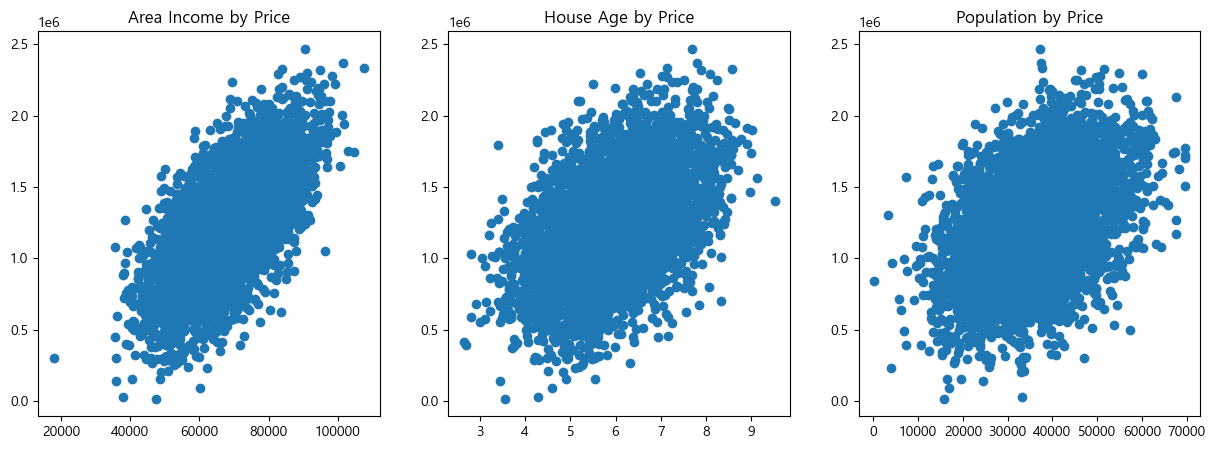

In [107]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df['Avg. Area Income'], df['Price'])
axes[0].set_title('Area Income by Price')
axes[1].scatter(df['Avg. Area House Age'], df['Price'])
axes[1].set_title('House Age by Price')
axes[2].scatter(df['Area Population'], df['Price'])
axes[2].set_title('Population by Price')
plt.show()

### ✨ 5 Cycle
> 중요 Feature 데이터 추출하여 단변량으로 분석하여 선형회귀 분석 시각화

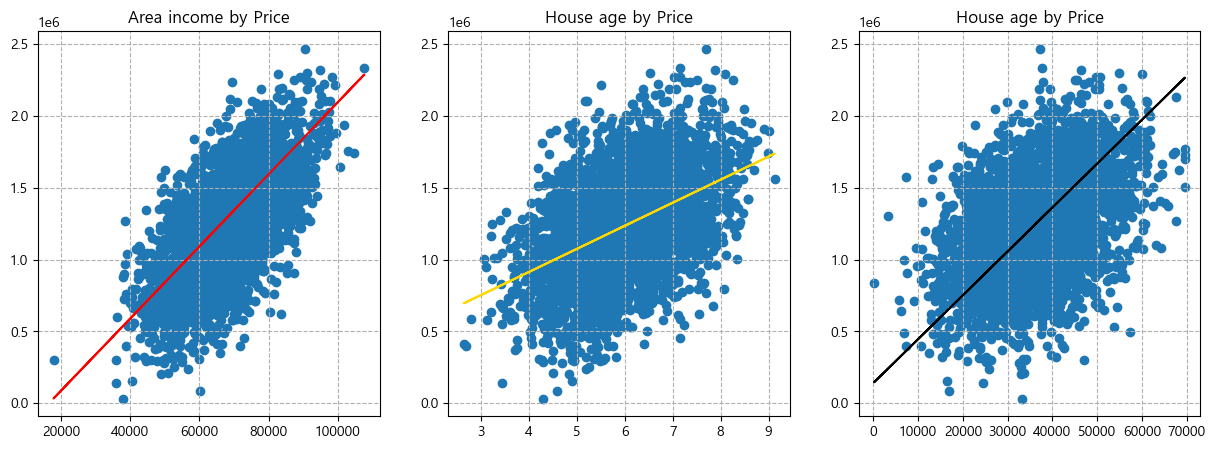

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

axes[0].scatter(X_train, y_train)
axes[0].plot(X_train, 25.1017 * X_train - 413647.8425, color="red")
axes[0].grid(visible=True, linestyle='--')
axes[0].set_title('Area income by Price')
#---------------------------------------------------------------------------
axes[1].scatter(X_train1, y_train1)
axes[1].plot(X_train1, 160898.8167 * X_train1 + 270503.8230, color='gold')
axes[1].grid(visible=True, linestyle='--')
axes[1].set_title('House age by Price')
#---------------------------------------------------------------------------
axes[2].scatter(X_train2, y_train2)
axes[2].plot(X_train2, 30.5525 * X_train2 + 140914.4008, color='black')
axes[2].grid(visible=True, linestyle='--')
axes[2].set_title('House age by Price')
plt.show()


In [38]:
feature_df = df.iloc[:, :-1]

In [39]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5,42625.620156,1.198657e+06


In [40]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(105)

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros((5, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=0.000000000123)

epochs = 100000

for epoch in range(1, epochs + 1):
    H = X_train.matmul(W) + b
    loss = torch.mean((y_train - H) ** 2)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, W5: {:.5f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), W[3].item(),
                      W[4].item(), b.item(), loss.item()))

 100/100000: W1: 13.1586, W2: 0.0032, W3: 0.0022, W4: 0.0014, W5: 9.48483, b: -0.0001, loss: 62265729024.0000
 200/100000: W1: 13.0805, W2: 0.0051, W3: 0.0029, W4: 0.0020, W5: 9.63279, b: -0.0005, loss: 62262161408.0000
 300/100000: W1: 13.0746, W2: 0.0071, W3: 0.0036, W4: 0.0027, W5: 9.64382, b: -0.0008, loss: 62262145024.0000
 400/100000: W1: 13.0742, W2: 0.0091, W3: 0.0043, W4: 0.0033, W5: 9.64464, b: -0.0011, loss: 62262149120.0000
 500/100000: W1: 13.0742, W2: 0.0110, W3: 0.0050, W4: 0.0040, W5: 9.64470, b: -0.0014, loss: 62262145024.0000
 600/100000: W1: 13.0742, W2: 0.0130, W3: 0.0057, W4: 0.0046, W5: 9.64470, b: -0.0018, loss: 62262145024.0000
 700/100000: W1: 13.0742, W2: 0.0149, W3: 0.0065, W4: 0.0053, W5: 9.64470, b: -0.0021, loss: 62262145024.0000
 800/100000: W1: 13.0742, W2: 0.0169, W3: 0.0072, W4: 0.0059, W5: 9.64470, b: -0.0024, loss: 62262149120.0000
 900/100000: W1: 13.0742, W2: 0.0188, W3: 0.0079, W4: 0.0066, W5: 9.64470, b: -0.0028, loss: 62262145024.0000
1000/10000

In [41]:
# 테스트 세트에서 예측 수행
with torch.no_grad():  # 그라디언트 계산 비활성화
    y_pred_test = X_test.matmul(W) + b

# 손실 계산
test_loss = torch.mean((y_test - y_pred_test) ** 2)

print('테스트 세트 손실:', test_loss.item())

# 훈련 세트에서 예측 수행
with torch.no_grad():  # 그라디언트 계산 비활성화
    y_pred_train = X_train.matmul(W) + b

# 훈련 세트에서의 손실 계산
train_loss = torch.mean((y_train - y_pred_train) ** 2)

print('훈련 세트 손실:', train_loss.item())

테스트 세트 손실: 63095578624.0
훈련 세트 손실: 62261751808.0


In [130]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation0(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('Train Data : MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [131]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation1(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('Test Data : MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = df.iloc[:,:-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

print('Coefficients (W1 to W5):', l_r.coef_)
print('Intercept (b):', l_r.intercept_)

Coefficients (W1 to W5): [2.15525035e+01 1.65963465e+05 1.21081616e+05 1.94230529e+03
 1.51812981e+01]
Intercept (b): -2640914.400838993


Train Data : MSE: 10185851826.5375, RMSE: 100924.9812, MSLE: 0.0106, RMSLE: 0.1030, R2: 0.9172
Test Data : MSE: 10359858078.5985, RMSE: 101783.3880, MSLE: 0.0125, RMSLE: 0.1119, R2: 0.9211


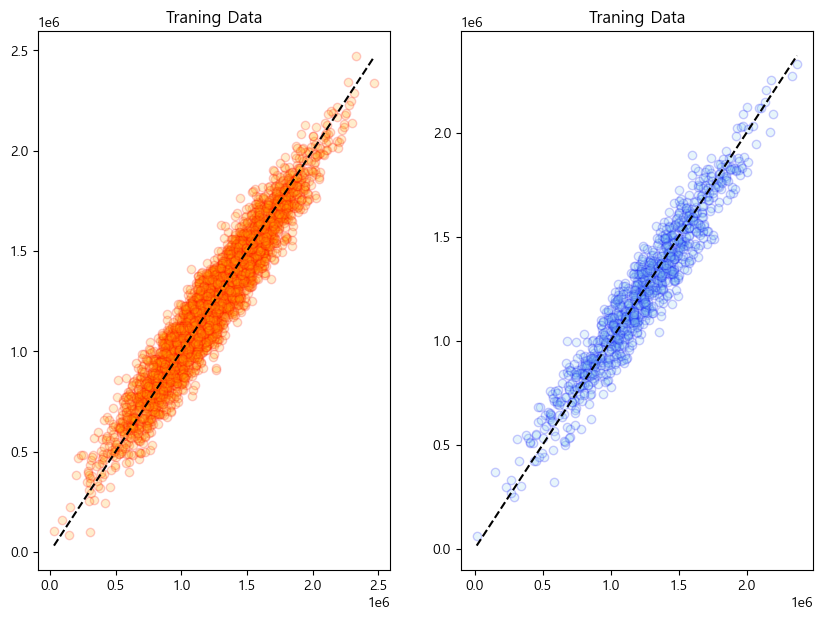

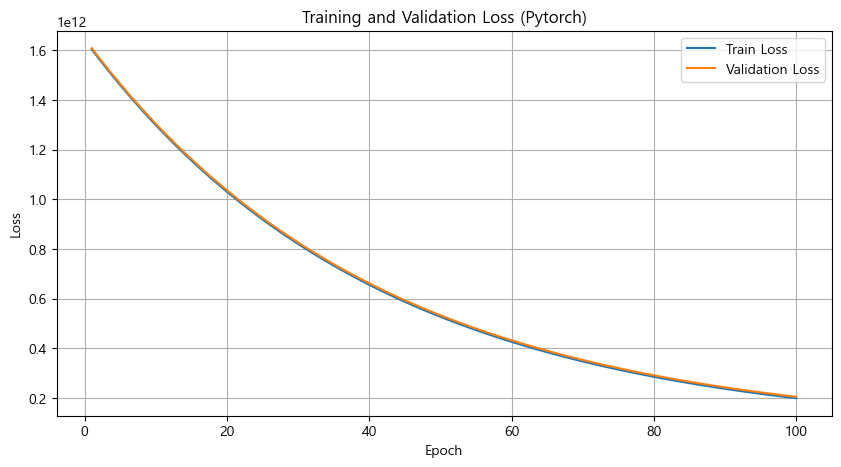

### ✨ 4 Cycle 
> 정규화된 선형회귀 (Regularized Linear Regression)를 활용하여 과대적합 해소

In [139]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Ridge 회귀 모델 초기화 및 훈련
ridge_model = Ridge(alpha=0.001, max_iter=100)
ridge_model.fit(X_train, y_train)

# 훈련 세트와 테스트 세트에서 예측 수행
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

# 손실 계산
train_loss_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
test_loss_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))

print('Ridge 회귀 훈련 세트 손실:', train_loss_ridge)
print('Ridge 회귀 테스트 세트 손실:', test_loss_ridge)

# Lasso 회귀 모델 초기화 및 훈련
lasso_model = Lasso(alpha=0.001, max_iter=100) 
lasso_model.fit(X_train, y_train)

# 훈련 세트와 테스트 세트에서 예측 수행
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

# 손실(Loss) 계산
train_loss_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
test_loss_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))

print('Lasso 회귀 훈련 세트 손실:', train_loss_lasso)
print('Lasso 회귀 테스트 세트 손실:', test_loss_lasso)


Ridge 회귀 훈련 세트 손실: 100924.98118176934
Ridge 회귀 테스트 세트 손실: 101783.38672089828
Lasso 회귀 훈련 세트 손실: 100924.98118175475
Lasso 회귀 테스트 세트 손실: 101783.3879782535


In [196]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# alpha 값의 범위 설정
alpha_values = [0.1, 1, 5, 10, 15, 20, 25, 30, 50 ,100, 1000]

features, targets = df.iloc[:,:-1], df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=124, test_size=0.2)

for alpha in alpha_values:
    # Ridge 모델 정의
    ridge = Ridge(alpha=alpha, max_iter=1000, random_state=124)

    # Ridge 모델 학습
    ridge.fit(X_train, y_train)

    # 예측 수행
    prediction = ridge.predict(X_test)

    # 결과 출력
    print("Ridge Regression with alpha =", alpha)
    get_evaluation(y_test, prediction)


Ridge Regression with alpha = 0.1
MSE: 10478209727.8124, RMSE: 102363.1268, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9198
Ridge Regression with alpha = 1
MSE: 10478410565.2710, RMSE: 102364.1078, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9197
Ridge Regression with alpha = 5
MSE: 10479359241.8455, RMSE: 102368.7415, MSLE: 0.0126, RMSLE: 0.1124, R2: 0.9197
Ridge Regression with alpha = 10
MSE: 10480673027.1061, RMSE: 102375.1583, MSLE: 0.0126, RMSLE: 0.1124, R2: 0.9197
Ridge Regression with alpha = 15
MSE: 10482127746.6583, RMSE: 102382.2629, MSLE: 0.0127, RMSLE: 0.1125, R2: 0.9197
Ridge Regression with alpha = 20
MSE: 10483722104.6417, RMSE: 102390.0489, MSLE: 0.0127, RMSLE: 0.1126, R2: 0.9197
Ridge Regression with alpha = 25
MSE: 10485454817.7851, RMSE: 102398.5098, MSLE: 0.0127, RMSLE: 0.1127, R2: 0.9197
Ridge Regression with alpha = 30
MSE: 10487324615.2641, RMSE: 102407.6394, MSLE: 0.0127, RMSLE: 0.1128, R2: 0.9197
Ridge Regression with alpha = 50
MSE: 10496149659.8431, RMSE: 102450.7182, MSLE: 

In [200]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# alpha 값의 범위 설정
alpha_values = [0.001, 0.1, 1, 5, 10, 15, 20, 25, 30, 50 ,100, 1000]

features, targets = df.iloc[:,:-1], df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=124, test_size=0.2)

for alpha in alpha_values:
    # Lasso 모델 정의
    lasso = Lasso(alpha=alpha, max_iter=1000, random_state=105)

    # Lasso 모델 학습
    lasso.fit(X_train, y_train)

    # 예측 수행
    prediction = lasso.predict(X_test)

    # 결과 출력
    print("Lasso Regression with alpha =", alpha)
    get_evaluation(y_test, prediction)


Lasso Regression with alpha = 0.001
MSE: 10478187705.1492, RMSE: 102363.0192, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9198
Lasso Regression with alpha = 0.1
MSE: 10478188267.3049, RMSE: 102363.0220, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9198
Lasso Regression with alpha = 1
MSE: 10478193379.1345, RMSE: 102363.0469, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9198
Lasso Regression with alpha = 5
MSE: 10478216140.4331, RMSE: 102363.1581, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9198
Lasso Regression with alpha = 10
MSE: 10478244691.6109, RMSE: 102363.2976, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9198
Lasso Regression with alpha = 15
MSE: 10478273347.9293, RMSE: 102363.4376, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9198
Lasso Regression with alpha = 20
MSE: 10478302091.2511, RMSE: 102363.5780, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9197
Lasso Regression with alpha = 25
MSE: 10478330957.6997, RMSE: 102363.7190, MSLE: 0.0126, RMSLE: 0.1123, R2: 0.9197
Lasso Regression with alpha = 30
MSE: 10478359929.2900, RMSE: 102363.8605, MSL

### 💡 4 Cycle Result
> 라쏘(Lasso)와 릿지(Ridge) 회귀 모델에서 규제(alpha) 값을 0.001에서 1000까지 다양하게 설정하여 실험해보았습니다. 그 결과, 규제 강도의 변화에 따라 성능에 큰 폭의 변화가 나타나지 않았습니다. 모든 실험에서 평균 제곱 오차(MSE)와 결정 계수(R2) 값은 거의 동일한 값을 보였습니다. 이러한 결과는 주어진 데이터셋에서 모델의 복잡성이나 중요한 특성에 대한 선택이 규제 강도에 크게 의존하지 않음을 시사합니다. 따라서 이러한 모델은 일반적으로 규제 강도의 변화에 상대적으로 강건하다고 볼 수 있습니다.

### ✨ 5 Cycle
OLS모델 & VIF Score 분석

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

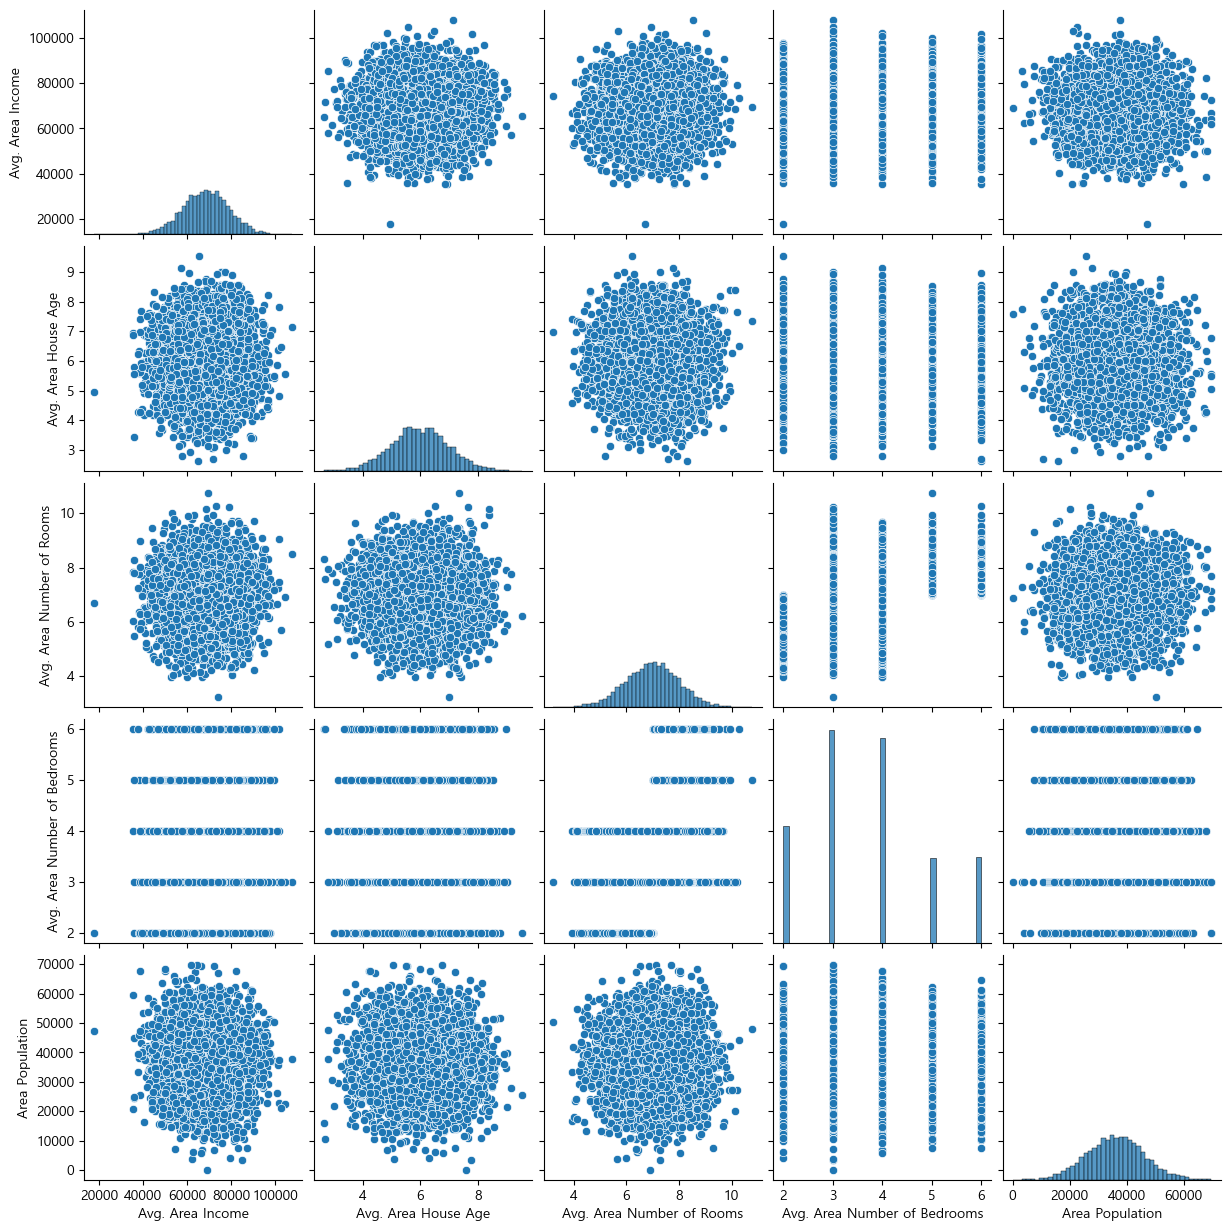

In [43]:
columns = feature_df.columns
sns.pairplot(df[columns])
plt.show()

In [44]:
from statsmodels.api import OLS

features, targets = df.iloc[:,:-1], df.iloc[:, -1]
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.705e+04
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        15:03:23   Log-Likelihood:                         -69076.
No. Observations:                5000   AIC:                                  1.382e+05
Df Residuals:                    4995   BIC:                                  1.382e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [46]:
get_vif(features)

,vif_score,feature
0,29.635528,Avg. Area Income
1,27.448131,Avg. Area House Age
2,45.039426,Avg. Area Number of Rooms
3,13.160497,Avg. Area Number of Bedrooms
4,12.829991,Area Population


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

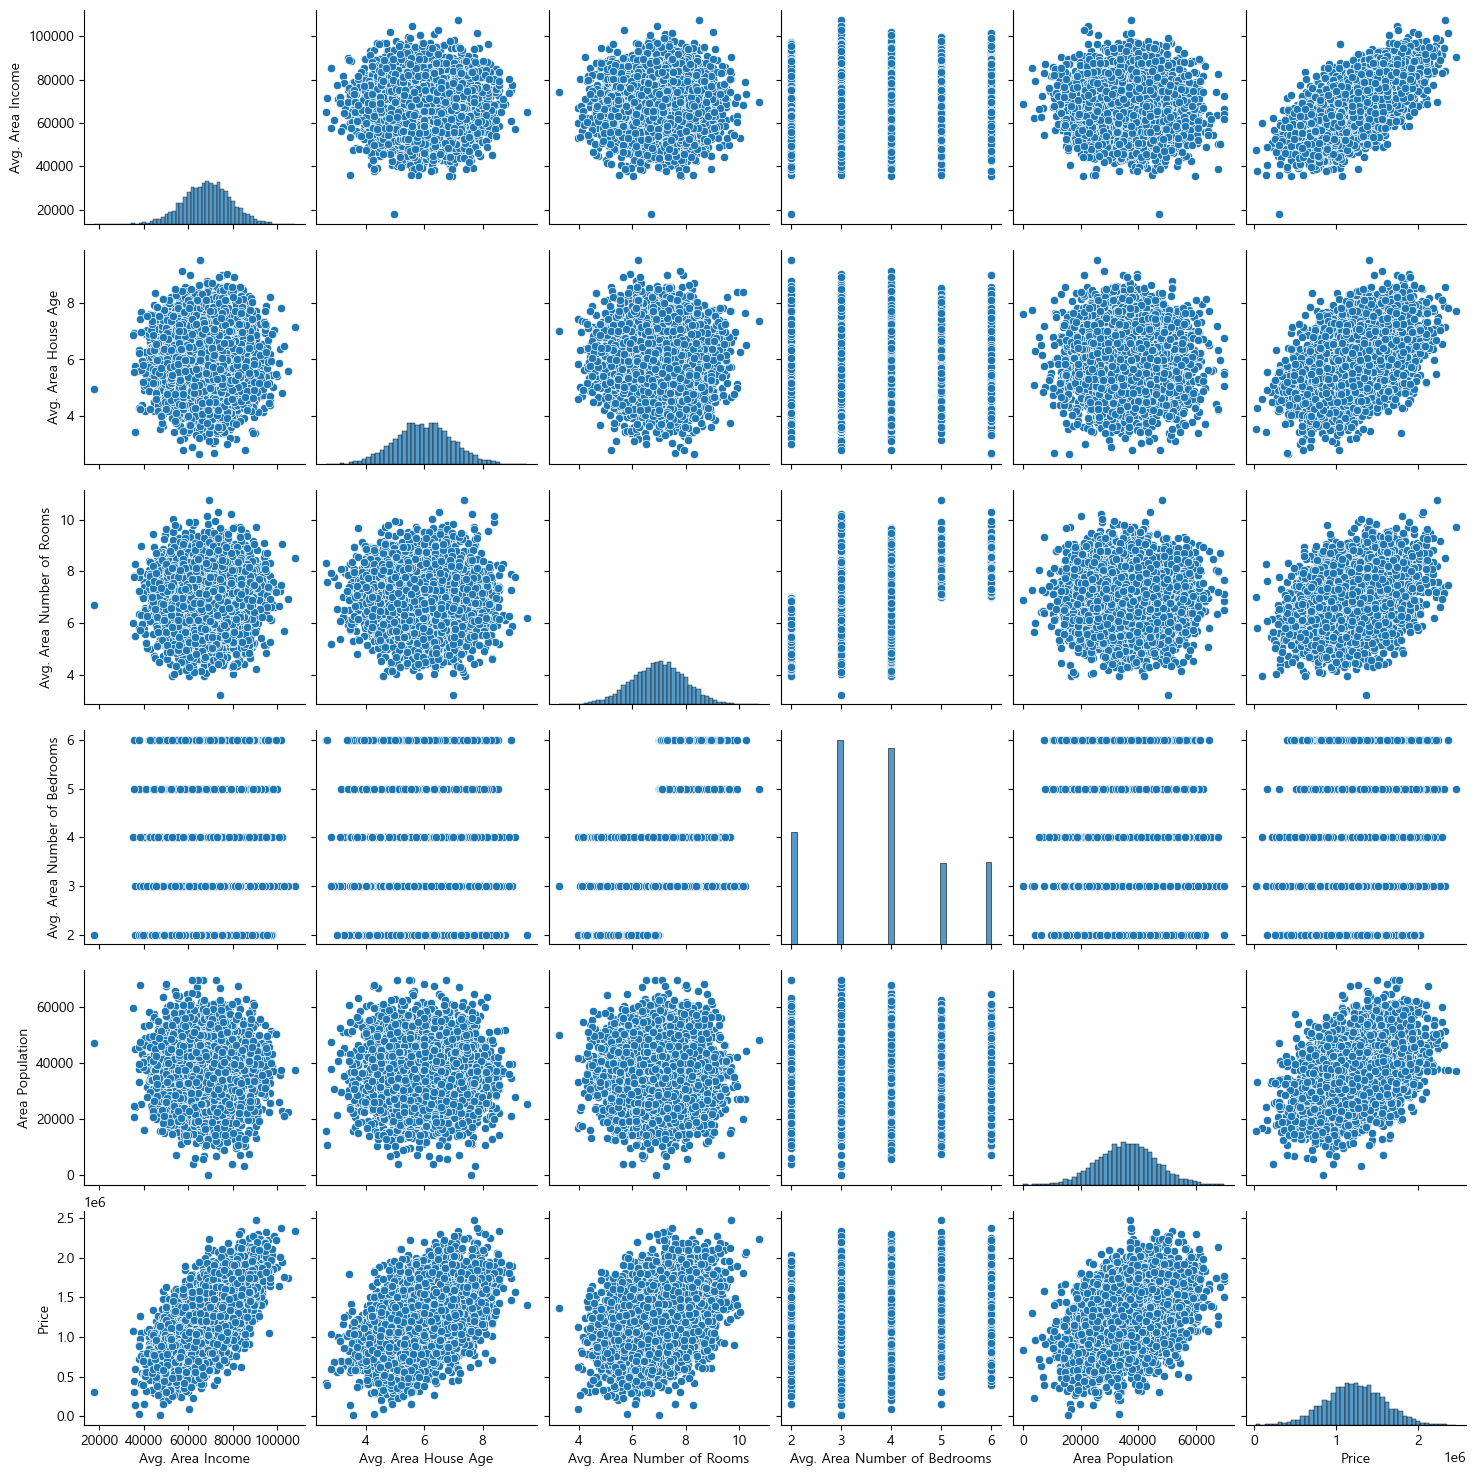

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()

주택의 방 개수에 가장 높은 다중공선성이 있는 것을 확인 

### ✨ 4 Cycle 
> 다중공선성을 가진 Feature 제거 후 제거 전 데이터와 회귀 성능 비교 & 과적합 유무 확인 진행

In [48]:
# 다중공선성 가진 Feature 제거 후 분석
del_df = df.copy()
del_df = del_df.drop(labels=['Avg. Area Number of Rooms'], axis=1)

In [49]:
from statsmodels.api import OLS

features, targets = del_df.iloc[:,:-1], del_df.iloc[:, -1]
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          3.372e+04
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        15:03:30   Log-Likelihood:                         -69082.
No. Observations:                5000   AIC:                                  1.382e+05
Df Residuals:                    4996   BIC:                                  1.382e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [51]:
get_vif(features)

,vif_score,feature
0,25.226452,Avg. Area Income
1,23.829819,Avg. Area House Age
2,9.396022,Avg. Area Number of Bedrooms
3,12.150300,Area Population


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

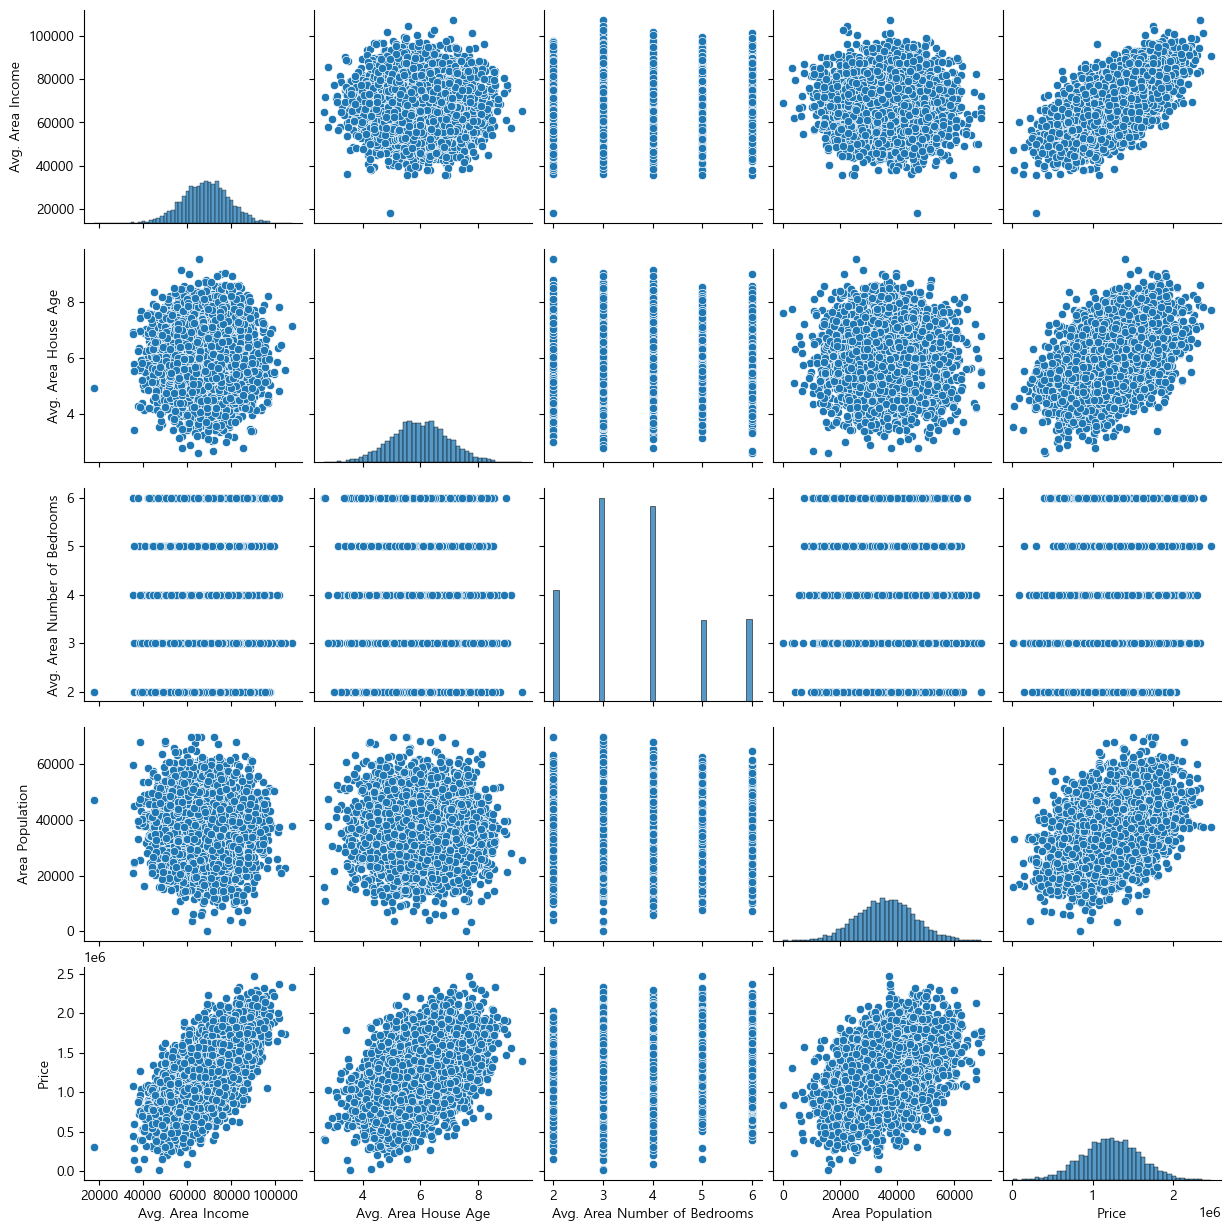

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(del_df)
plt.show()

### 과적합 확인 

In [53]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f},  R2: {:.4f}'\
          .format(MSE, RMSE,R2))

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features , targets = del_df.iloc[:,:-1] , del_df.iloc[: ,-1]

X_train, X_test ,y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

# 10-fold 교차 검증을 통한 모델 성능 평가
cv_scores = cross_val_score(l_r, X_train, y_train, cv=10)

# 교차 검증 결과 출력
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())



Cross-validation scores: [0.81114263 0.82388932 0.81845725 0.81862978 0.79701496 0.82296693
 0.83828206 0.855918   0.83418115 0.78115979]
Mean CV score: 0.8201641877938453


MSE: 21933472654.8120, RMSE: 148099.5363,  R2: 0.8217


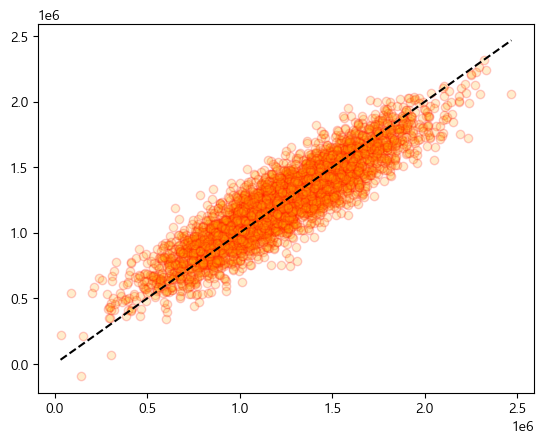

In [55]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 20802936839.2446, RMSE: 144232.2323,  R2: 0.8415


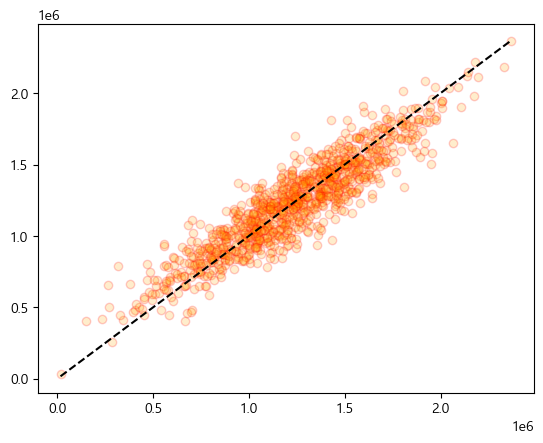

In [56]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features , targets = del_df.iloc[:,:-1] , del_df.iloc[: ,-1]

X_train, X_test ,y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 20802936839.2446, RMSE: 144232.2323,  R2: 0.8415


### 📌 교차검증을 한 뒤 Train Data와 Test Data의 일반화 된 성능을 볼 수 있습니다.
>  Feature 제거 후 성능이 0.91에서 0.84로 0.7 가량 떨어진 것을 볼 수 있지만 과적합이 존재 하지 않았던 점을 감안하여, 꽤 괜찮은 신뢰도를 보이는 데이터로 변경된 것을 볼 수 있습니다.


#### 📌 그러나 Feature 제거 후 성능이 다소 떨어진 것을 볼 수 있습니다.

### ✨ 제거 전 데이터의 과적합 유무 분석

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features , targets = df.iloc[:,:-1] , df.iloc[: ,-1]

X_train, X_test ,y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

# 10-fold 교차 검증을 통한 모델 성능 평가
cv_scores = cross_val_score(l_r, X_train, y_train, cv=10)

# 교차 검증 결과 출력
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.91007982 0.91421874 0.91996958 0.91312963 0.9055856  0.9218239
 0.92222533 0.92693743 0.92925793 0.9010264 ]
Mean CV score: 0.9164254345538225


In [59]:
prediction = l_r.predict(X_test)
get_evaluation(prediction, y_test)

MSE: 10359858078.5985, RMSE: 101783.3880,  R2: 0.9145


MSE: 10185851826.5375, RMSE: 100924.9812,  R2: 0.9172


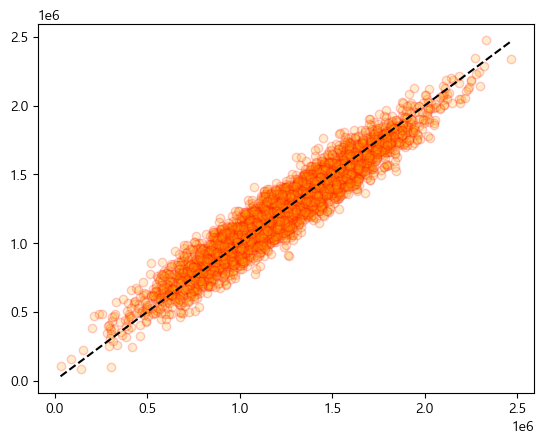

In [60]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features , targets = df.iloc[:,:-1] , df.iloc[: ,-1]

X_train, X_test ,y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 10359858078.5985, RMSE: 101783.3880,  R2: 0.9211


MSE: 10359858078.5985, RMSE: 101783.3880,  R2: 0.9211


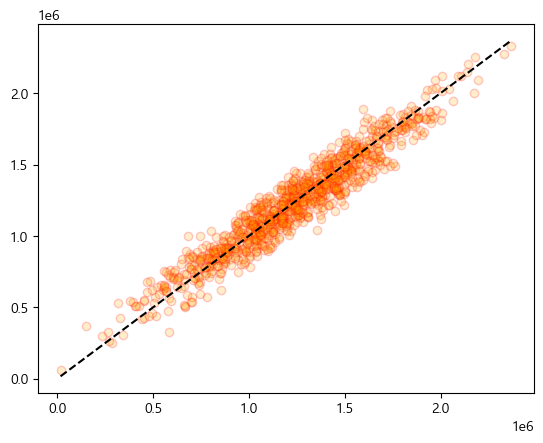

In [62]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

### 📌 Feature 제거 전 데이터 역시 과적합 되지 않았고, 일반화 된 성능을 보입니다.

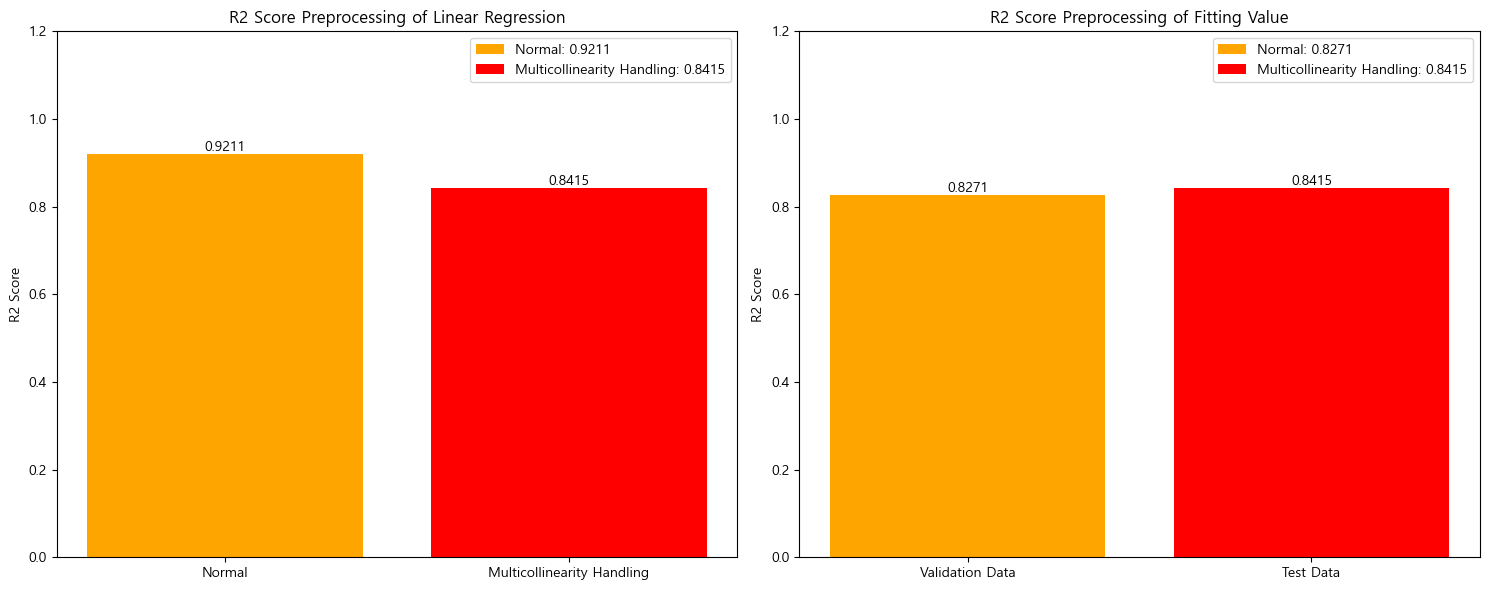

In [63]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

colors = ['orange', 'red']
Linear = [0.9211, 0.8415]
OverFitting = [0.8271, 0.8415]

regressor = ['Normal', 'Multicollinearity Handling']

for i, (method, scores) in enumerate(zip(['Linear Regression', 'Fitting Value'], [Linear, OverFitting])):
    for j, score in enumerate(scores):
        axes[i].bar(regressor[j], score, color=colors[j], label=f'{regressor[j]}: {score:.4f}')
        axes[i].text(j, score, f'{score:.4f}', color='black', ha='center', va='bottom')
    axes[i].set_ylabel('R2 Score')
    axes[i].set_title(f'R2 Score Preprocessing of {method}')
    axes[i].set_ylim(0, 1.2) 
    axes[i].legend()


axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Validation Data', 'Test Data'])

plt.tight_layout() 
plt.show()


### ✨ 4 Cycle Result
- 해당 데이터의 다중공선성이 높은 Feature를 제거 후 성능 평가를 해본 결과 기존 제거를 하기 전 데이터의 성능이 더 좋은 것을 알 수 있습니다.

  
-  교차 검증을 통해 얻은 검증 데이터와 기존의 테스트 데이터를 비교하여 과적합 여부를 확인한 결과, 검증 데이터의 성능은 0.8271이고 테스트 데이터의 성능은 0.8415로 거의 비슷한 수치를 보였으며, 시각화 분석 결과 분포 또한 차이가 나지 않기때문에 과적합 발생 가능성은 보이지 않았습니다.

### 💡 5 Cycle 
> 다양한 회귀 모델을 활용한 데이터 예측과 평가

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = del_df.iloc[:, :-1], del_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

dt_r = DecisionTreeRegressor(random_state=105)
rf_r = RandomForestRegressor(random_state=105)
gb_r = GradientBoostingRegressor(random_state=105, n_estimators=100)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 48684895920.5763, RMSE: 220646.5407,  R2: 0.6291
RandomForestRegressor
MSE: 25351867611.2826, RMSE: 159222.6982,  R2: 0.8068
GradientBoostingRegressor
MSE: 22143898667.1534, RMSE: 148808.2614,  R2: 0.8313
XGBRegressor
MSE: 27293061122.5073, RMSE: 165206.1171,  R2: 0.7921
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 4
[LightGBM] [Info] Start training from score 1232567.230596
LGBMRegressor
MSE: 23155034369.1717, RMSE: 152167.7836,  R2: 0.8236


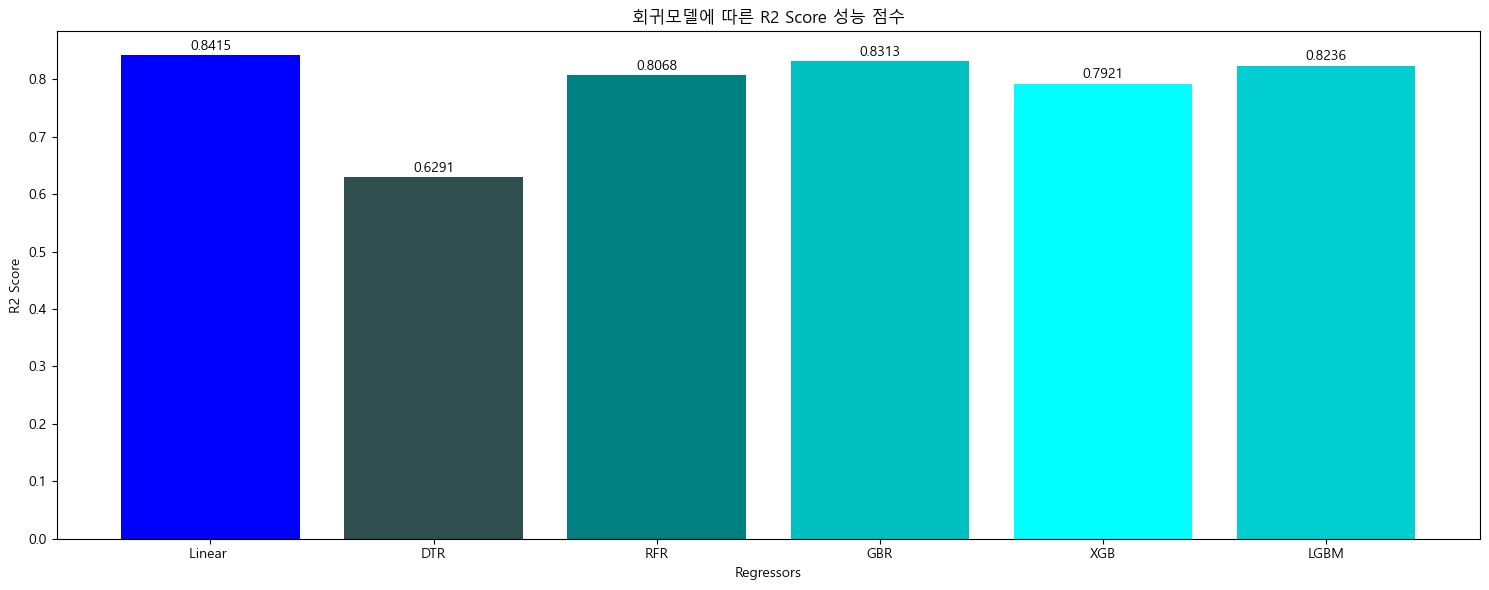

In [65]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, figsize=(15, 6))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

colors = ['blue', 'darkslategray', 'teal', 'c', 'cyan', 'darkturquoise', 'cadetblue']

scores = [0.8415, 0.6291, 0.8068, 0.8313, 0.7921, 0.8236]

regressers = ['Linear ','DTR', 'RFR', 'GBR', 'XGB', 'LGBM']

for i, v in enumerate(scores) :
    plt.text(i, v+0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(regressers, scores, color=colors)
    plt.xlabel('Regressors')
    plt.ylabel('R2 Score')
    plt.title('회귀모델에 따른 R2 Score 성능 점수')

plt.tight_layout() 

plt.show()

### 💡 Total Cycle Result
- 최종 회귀모델들의 성능을 평가해본 결과 선형회귀기법의 성능이 가장 높은 것을 볼 수 있으며, 해당 데이터는 완벽한 선형 데이터 임을 알 수 있었습니다.

- 그러나 Feature 제거 전에 비해 성능이 많이 떨어진것을 볼 수 있으므로, 굳이 다중공선성을 해소하기 위해 Feature를 제거 할 필요가 없어보입니다.